# Exercises in linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [3]:
#Loading in the dataset
energyData = pd.read_csv('EnergyEfficiency.csv')
energyData

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`. And calculating the correlation

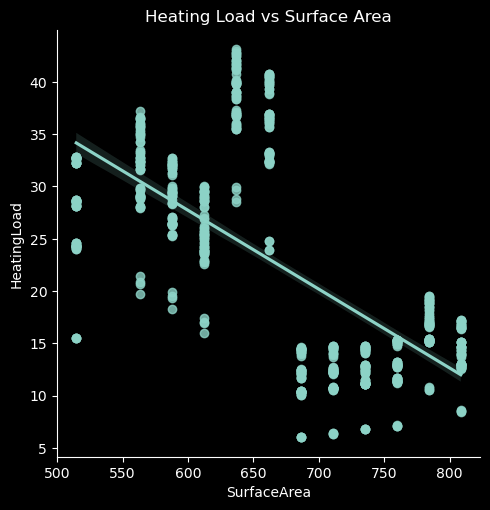

The correlation is -0.6581202267776209


In [4]:
#visualizing the relationshio/correlation between the variables SurfaceArea and HeatingLoad
sns.lmplot(x='SurfaceArea', y='HeatingLoad', data=energyData)
plt.title('Heating Load vs Surface Area')
plt.show()

#Calculating the correlation between the variables SurfaceArea and HeatingLoad
correlation = energyData['HeatingLoad'].corr(energyData['SurfaceArea'])
print("The correlation is", correlation)

After making the regplot, i calculated the correlation. The correlation is closer to a near perfect negative correlation

3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?

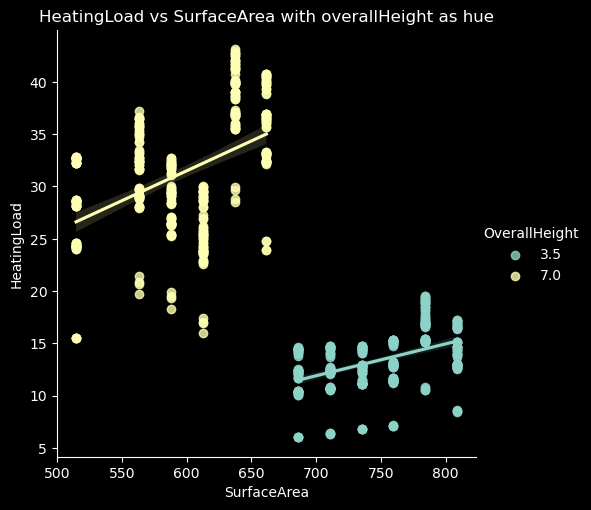

In [5]:
#Adding hue to the plot
sns.lmplot(x='SurfaceArea', y='HeatingLoad', data=energyData, hue='OverallHeight')
plt.title('HeatingLoad vs SurfaceArea with overallHeight as hue')
plt.show()

4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).


In [6]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error

#Training a linear regression model with SurfaceArea as the independent variable and HeatingLoad as the dependent variable
X = energyData['SurfaceArea']
y = energyData['HeatingLoad']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           1.69e-96
Time:                        12:14:56   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.9454      2.111     34.554      

5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?

In [7]:
#What does the model say about the change in HeatingLoad when the SurfaceArea is increased by 1?
print("The HeatingLoad will increase by", model.params['SurfaceArea'])


The HeatingLoad will increase by -0.07538715748537178


6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.

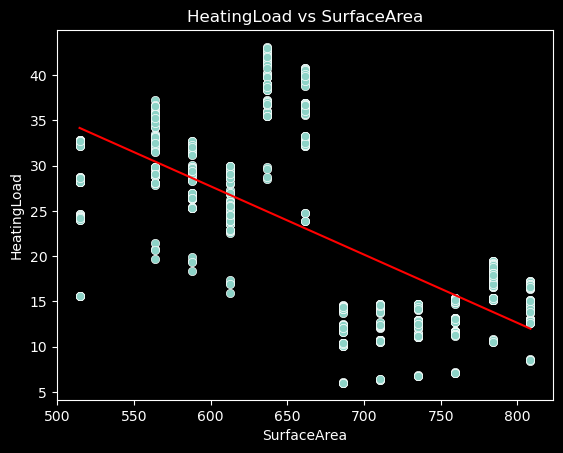

In [8]:
#Adding the linear regression line to the plot
sns.scatterplot(x='SurfaceArea', y='HeatingLoad', data=energyData)
plt.plot(energyData['SurfaceArea'], predictions, color='red')
plt.title('HeatingLoad vs SurfaceArea')
plt.show()


7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [9]:
#Evaluating the model
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Mean Squared Error: 57.63983779426343
Mean Absolute Error: 6.002338517195693
Root Mean Squared Error: 7.592090475900786
R2 Score: 0.43312223289382823


## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

In [21]:
#Training a multiple linear regression model for HeatingLoad using at least two other variables
X = energyData[['SurfaceArea', 'OverallHeight']]
y = energyData['HeatingLoad']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            HeatingLoad   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1908.
Date:                Fri, 14 Mar 2025   Prob (F-statistic):          4.58e-298
Time:                        12:25:41   Log-Likelihood:                -2177.2
No. Observations:                 768   AIC:                             4360.
Df Residuals:                     765   BIC:                             4374.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -45.6468      2.998    -15.224

2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?


In [22]:
#Evaluating the multiple linear regression model to the linear regression model
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Mean Squared Error: 16.977612075901163
Mean Absolute Error: 3.1292217843191956
Root Mean Squared Error: 4.120389796597061
R2 Score: 0.83302814177351


From the `Multiple Linear Model` The MSE went down from 57.64 to 16.98, just by adding 1 additional parameter. Also the R2 score went up from 0.433 to 0.833, which is a significant increase

3. Check each of the assumptions/problems for linear regression.

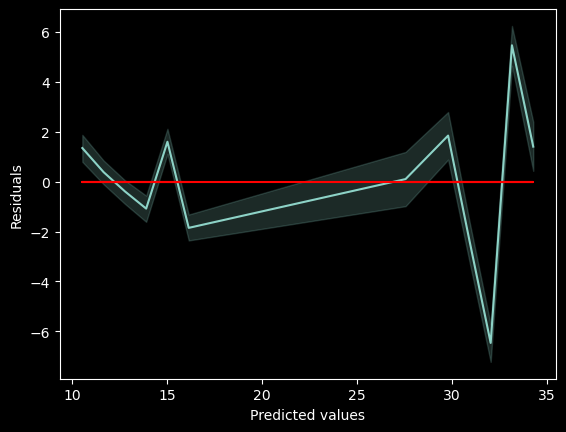

In [23]:
# Lets inspect for a linear relationship between the variables
sns.lineplot(x=predictions, y=model.resid)
plt.plot(predictions, np.repeat(0, len(predictions)), color='red')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


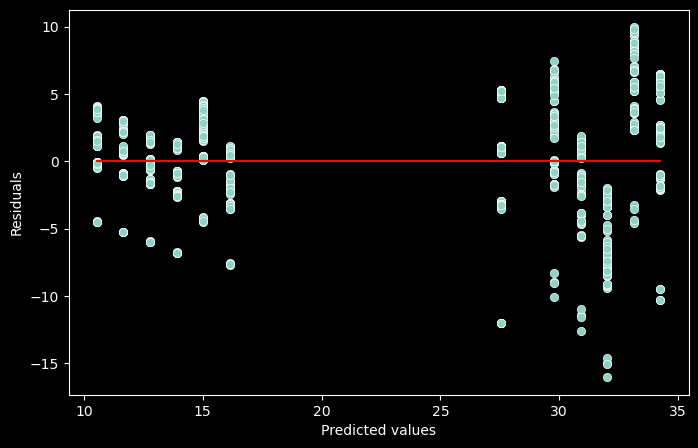

In [24]:
# Non-constant variance of error terms
plt.rc("figure", figsize=(8,5))
sns.scatterplot(x=predictions, y=model.resid)
plt.plot(predictions, np.repeat(0, len(predictions)), color='red')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


In [25]:
# High leverage points
leverageStats = model.get_influence().hat_matrix_diag
leverageStats

array([0.00685587, 0.00685587, 0.00685587, 0.00685587, 0.00328444,
       0.00328444, 0.00328444, 0.00328444, 0.00264668, 0.00264668,
       0.00264668, 0.00264668, 0.00277423, 0.00277423, 0.00277423,
       0.00277423, 0.00366709, 0.00366709, 0.00366709, 0.00366709,
       0.00532526, 0.00532526, 0.00532526, 0.00532526, 0.00499575,
       0.00499575, 0.00499575, 0.00499575, 0.00346514, 0.00346514,
       0.00346514, 0.00346514, 0.00269983, 0.00269983, 0.00269983,
       0.00269983, 0.00269983, 0.00269983, 0.00269983, 0.00269983,
       0.00346514, 0.00346514, 0.00346514, 0.00346514, 0.00499575,
       0.00499575, 0.00499575, 0.00499575, 0.00685587, 0.00685587,
       0.00685587, 0.00685587, 0.00328444, 0.00328444, 0.00328444,
       0.00328444, 0.00264668, 0.00264668, 0.00264668, 0.00264668,
       0.00277423, 0.00277423, 0.00277423, 0.00277423, 0.00366709,
       0.00366709, 0.00366709, 0.00366709, 0.00532526, 0.00532526,
       0.00532526, 0.00532526, 0.00499575, 0.00499575, 0.00499

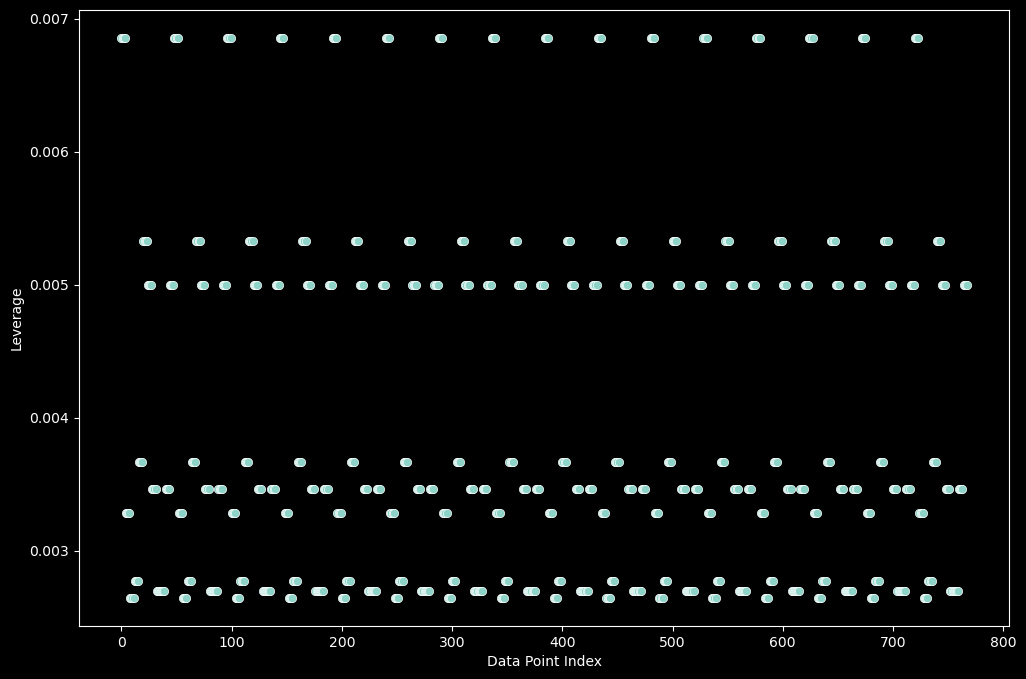

In [26]:
plt.rc("figure", figsize=(12,8))
sns.scatterplot(x = range(0, len(leverageStats)), y=leverageStats)
plt.ylabel('Leverage')
plt.xlabel('Data Point Index')
plt.show()

In [31]:
# Correlation of error terms
X.corr()


,const,SurfaceArea,OverallHeight
const,NaN,NaN,NaN
SurfaceArea,NaN,1.000,-0.858
OverallHeight,NaN,-0.858,1.000
